In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from mlxtend.evaluate import bias_variance_decomp

<IPython.core.display.Javascript object>


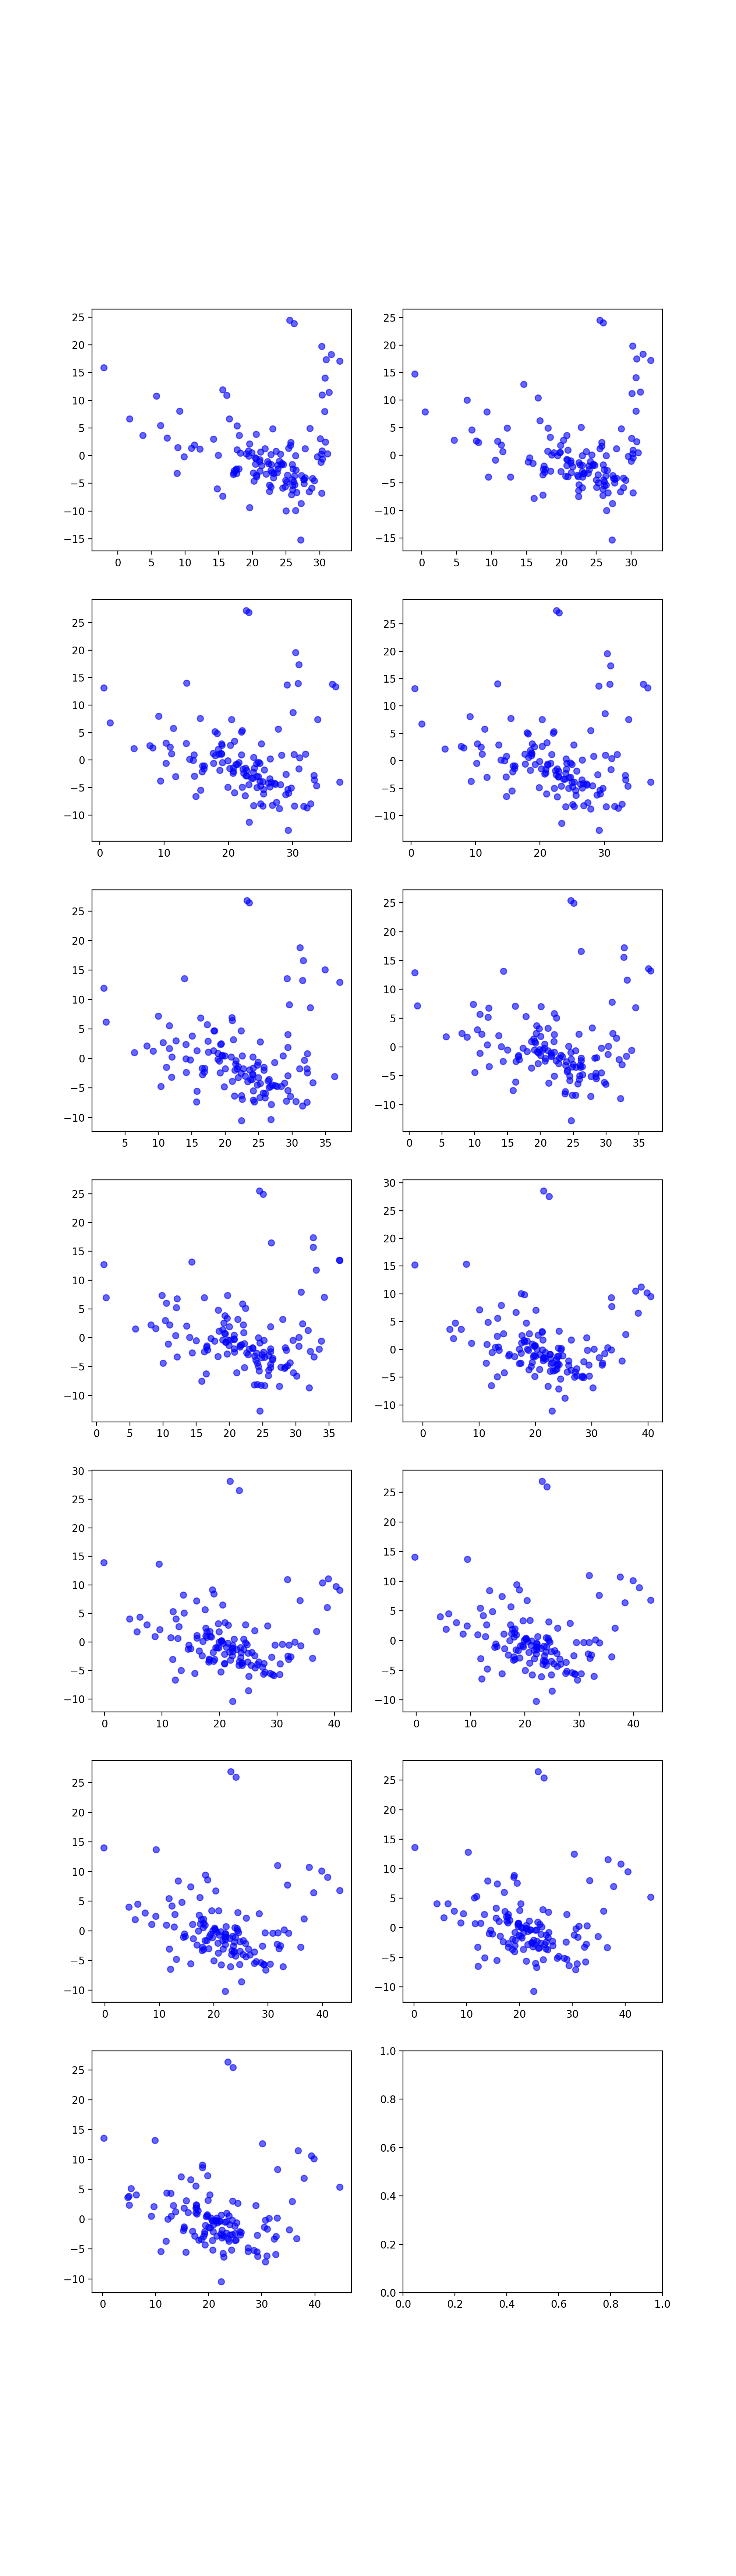

[ -5.0620834   24.46359842  -1.59488955  -7.2971405   -1.60892857
  -6.66527041  -3.07279013  -7.06935302  -6.41773928  -5.86870752
  -5.97210418   3.0102744   -2.61898981   3.16292901  17.07709677
  -1.18572391  -1.36193812   2.47365966  -0.21305164  -5.27408112
  -3.99797173  -4.00982417  -0.71032438   1.29232196  -5.57637253
   1.25199608  -1.76268843  -0.06025174   7.99984168   0.50156851
  -2.68603838  -0.51823949  -4.43461039  -2.65069071  -2.41201076
  -3.77647735  -3.20272375  23.83268829  -3.16458446   1.90569158
  -2.558501    -1.05208653  -6.16347921  -3.37926897  -9.89055683
  -4.31494766   0.88827981  -3.11057449   5.44326629   1.85682901
  -4.60763759   5.3965903    0.82133606  11.44951894  -2.38489268
   2.16209778  -5.62157179  -5.28862035  -9.97343562   3.67628209
  -8.62529946  -1.4303825    3.03075181   0.36305775  -0.36000164
  -0.56043748  -2.37722767   0.06288855  11.91256581  -1.63575609
  -3.16806203  -4.70907385  -6.75366807   0.88809407  -3.57383101
   3.66396

[ -3.51000814  25.36202669  -5.49179478  -7.49575593   0.52963238
  -2.88064423  -0.99824891  -5.78340395  -7.70799008  -0.47911221
  -3.36812259   5.1804608   -1.68574647   1.70064598  13.21121769
  -1.27339685   0.95479683  -0.57917986  -3.03923295  -4.96572915
  -2.37437722  -8.56718271   1.41166184  -0.18879081  -6.382127
   3.68899337   0.97929194  -5.06273051   7.76956143  -0.83363455
  -2.16345248   0.73389094  -0.66343787  -4.03668445  -6.12881199
  -2.83923793  -4.37709135  24.91766432  -0.48276924   2.26179986
  -4.55200452  -2.35583334  -4.25718451  -2.46185423  -8.37074327
  -4.80589194  -1.37047948  -8.36709058  -2.49083644   5.03961456
  -8.12114058   5.29844292  -1.8833141   16.58113441   1.95203152
  -1.62637948  -5.01032444  -0.7460196   -6.24899226   2.37012647
  -1.43250869  -1.88926693   1.54612851  -1.59573343   0.96931345
  -2.15018579  -1.48769787  -3.62470116  13.14167181  -2.10562774
  -1.65573921  -2.52546664  -6.44926365   3.3106534   -0.92325367
   1.7736327

[ -2.43112992  26.47482715  -6.37756346  -5.10378632  -0.07420635
   0.19001813   0.80085857  -2.85601326  -3.04968041  -1.30268789
  -3.27703911   1.08049152  -1.40232713   4.08649485   9.50469561
  -3.28953775   1.15981129  -3.33043559  -1.5958537   -2.28665729
  -1.21185182  -5.38357967  -0.06294877  -1.23087905  -3.23662215
  12.82706554   1.83570281   1.24462463   2.80213476  -1.72113022
  -3.25617804   2.74837425   0.74771029  -3.4824968   -5.32766484
  -1.88924933  -6.54471598  25.40820352  -2.35928274  -0.95219167
  -2.30144837  -0.80474789  -2.54944435  -1.04644639  -6.72211948
  -3.70800615   0.59635399  -6.00273334   2.41141813   3.0855868
  -5.66976444   6.00494021   0.1282471   12.49507739   2.2484551
   0.42582317  -3.64532042   1.63417141  -3.63194309  -0.36168597
   0.80560775  -0.6053531    0.34226708   0.27002207   2.25538777
  -2.79717063  -2.62681518  -4.03352171   8.58425199  -0.394466
  -2.73334148  -2.62377118  -7.07859513   2.29760468  -1.68761389
   1.69861485 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [70]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# separate into inputs and outputs
data = dataframe.values
y = data[:, -1]
biasList = []
varList = []

fig, subaxes = plt.subplots(7, 2, figsize=(10,35))


for i,k in zip(range(12,-1, -1), range(0, 14, 1)):
    X= data[:, i:-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    linreg = LinearRegression().fit(X_train, y_train)
    y_fitted = linreg.predict(X_train)
    y_predict = linreg.predict(X_test)
    
    mse, bias, var = bias_variance_decomp(
        linreg, X_train, y_train, X_test, y_test, loss = 'mse')
    biasList.append(bias)
    varList.append(var)
    residuals = y_test - y_predict
    print(residuals)
    
    
    
    subaxes.flat[k].plot(y_predict, residuals, 'o',  alpha=0.6, color = 'blue', label='Test Data')
    #subaxes.flat[k].plot(X_test, y_predict, '^',  alpha=0.6,color = 'red', label='Predict Data')
    #subaxes.flat[k].plot(X_train, y_train, 'o', alpha = 0.6, color = 'blue', label = 'Train Data')
    #subaxes.flat[k].plot(X_train, y_fitted, 'o', alpha = 0.6, color = 'orange', label = 'Fitted Data')
    #subaxes.flat[k].set_xlabel('x')
    #subaxes.flat[k].set_ylabel('y')
    #subaxes.flat[k].set_title('Compare real train/test data and fitted/predict data')
    #subaxes.flat[k].legend()
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
x_num = [i for i in range(1,14)]
x_num    

In [ ]:

fig, subaxes = plt.subplots(4, 2, figsize=(10,18))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for i, K in zip(range(0,8,2), [1, 3, 5, 7, 9, 11, 13, 15]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    subaxes.flat[i].plot(X_predict_input, y_predict_output)
    subaxes.flat[i].plot(X_train, y_train, 'o', alpha=0.6, label='Train')
    subaxes.flat[i].plot(X_test, y_test, '^', alpha=0.6, label='Test')
    subaxes.flat[i].set_xlabel('x')
    subaxes.flat[i].set_ylabel('y')
    subaxes.flat[i].set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    subaxes.flat[i].legend()
    
    
    y_predict = knnreg.predict(X_test)
    subaxes.flat[i+1].plot(X_test, y_test, '^',  alpha=0.6, color = 'green', label='Real Data')
    subaxes.flat[i+1].plot(X_test, y_predict, '*',  alpha=0.6,color = 'red', label='Predict Data')
    subaxes.flat[i+1].set_xlabel('x')
    subaxes.flat[i+1].set_ylabel('y')
    subaxes.flat[i+1].set_title('Compare real(test) data and predict data')
    subaxes.flat[i+1].legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

<IPython.core.display.Javascript object>


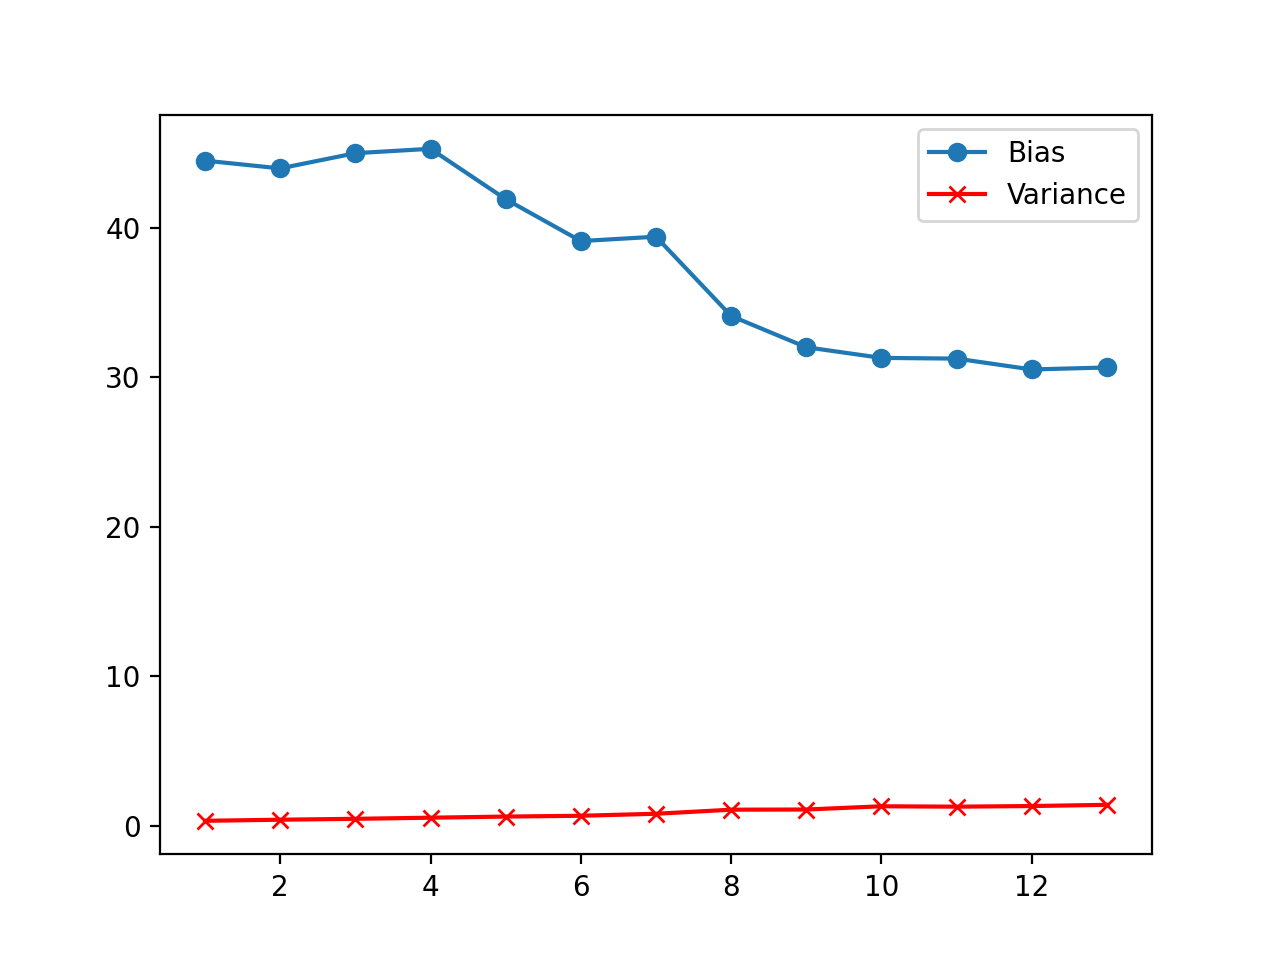

In [58]:
fig = plt.figure()
plt.plot(x_num, biasList, '-o', x_num, varList, '-xr')
plt.legend(['Bias', 'Variance'])

plt.show()

<IPython.core.display.Javascript object>


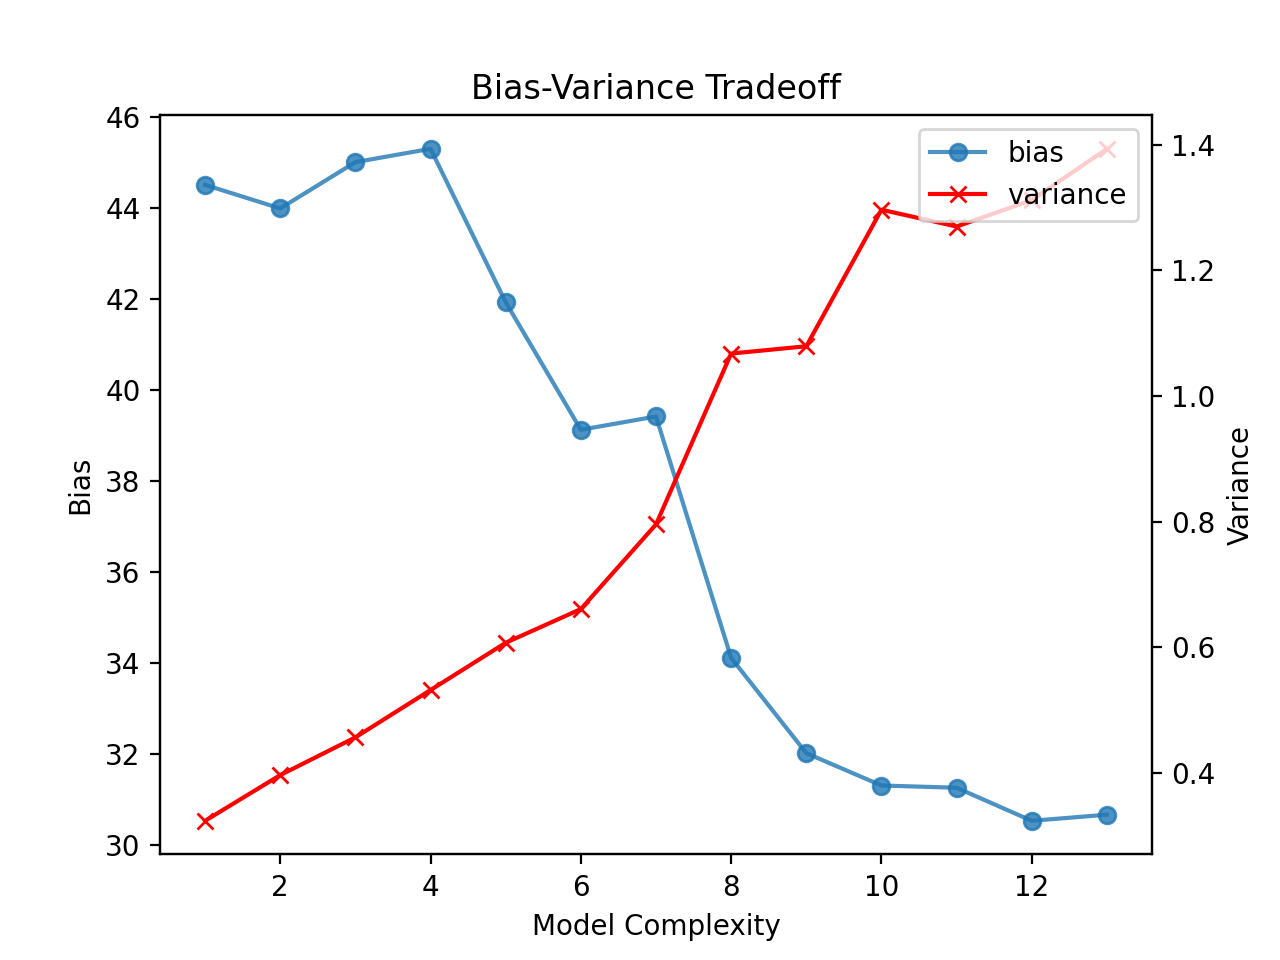

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_num, biasList, '-o',alpha=0.8, label = 'bias')
ax1.set_ylabel('Bias')
ax1.set_xlabel('Model Complexity')
ax1.set_title('Bias-Variance Tradeoff')

ax2 = ax1.twinx()
ax2.plot(x_num, varList, '-xr', label = 'variance')
ax2.set_ylabel('Variance')
fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

In [51]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
